METHOD 1:
Shifting in timedomain and substracting signals.
Timeshift: 0.0019902472215922


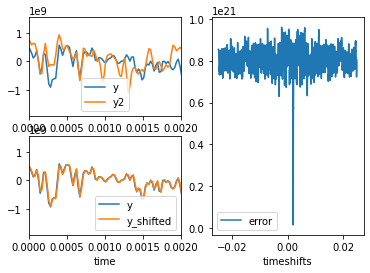

Wall time: 2.49 s


In [4]:
%%time
# Code borrowed from https://stackoverflow.com/questions/4688715/find-time-shift-between-two-similar-waveforms

# Edited for EIT2B216 P2 project spring 2021 i wav files.
samplerate_y, y = wavfile.read('audio_input/602msTo702ms.wav')
samplerate_y2, y2 = wavfile.read('audio_input/600msTo700ms.wav')

# Define time steps for shifting.
dt = (1/samplerate_y)

# Number of samples.
n = len(y) #512

# Calculate time length.all
lengthY = (1/samplerate_y) * len(y)

# Generate fft bin frequency 
freq = fftfreq(n, dt)

# Windowing of Inputs
y = y * np.hamming(n)
y2 = y2 * np.hamming(n)

# Generate FFT
Y = fft(y)
Y2 = fft(y2)

# Generate x axis for plots.
time = np.linspace((-n * dt)/2, (n * dt)/2, n)

### METHOD 1 - Shifting and substracting signals, least squared method###
# Scan possible time-shifts
error = [] # Array for storing errors
# Too be explained.
timeshifts = np.linspace(-n/2, n/2, n) * dt/2 
for ts in timeshifts:
    Y2_shifted = Y2 * np.exp(-1j * 2 * np.pi * freq * -ts)
    y2_shifted = ifft(Y2_shifted).real
    error.append(np.sum((y2_shifted - y) ** 2))

# Show the results - the timeshift index with least error between the two signals 
ts_final = timeshifts[np.argmin(error)]
print("METHOD 1:")
print("Shifting in timedomain and substracting signals.")
print("Timeshift: " + str(ts_final))

# Shift the original (shifted) signal the calculated value
Y2_shifted = Y2 * np.exp(1j * 2 * np.pi * freq * ts_final)
y2_shifted = ifft(Y2_shifted).real

## Plot results from method 1 ##
plt.figure(0)
plt.subplot(221)
plt.plot(time, y, label="y")
plt.plot(time, y2, label="y2")
plt.xlabel("time")
plt.legend()
plt.xlim(0,0.002)

plt.subplot(223)
plt.plot(time, y, label="y")
plt.plot(time, y2_shifted, label="y_shifted")
plt.xlabel("time")
plt.legend()
plt.xlim(0,0.002)

plt.subplot(122)
plt.plot(timeshifts, error, label="error")
plt.xlabel("timeshifts")
plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

from scipy.io import wavfile